In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import train and test dataset
train_data = pd.read_csv('bsd_dataset/train.csv')
test_data = pd.read_csv('bsd_dataset/test.csv')

#add the registered, casual and count columns with default value in test_data
test_data['casual'] = 0
test_data['registered'] = 0
test_data['count'] = 0

#combine the data (to understand the distribution of independent variable together). 
data = pd.concat([train_data, test_data], keys=['x', 'y'])
#data = [train_data, test_data]
a = str(data)
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,22.563726,97.436044,119.999770
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,43.210268,141.251913,170.711941
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,3.000000,23.000000,28.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,26.000000,155.000000,192.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


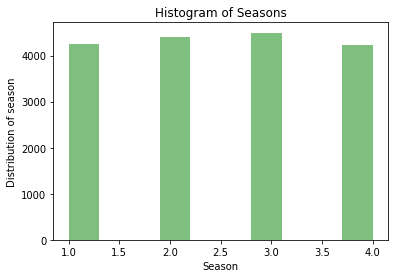

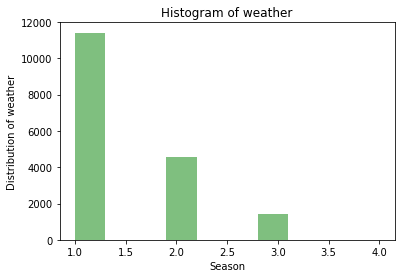

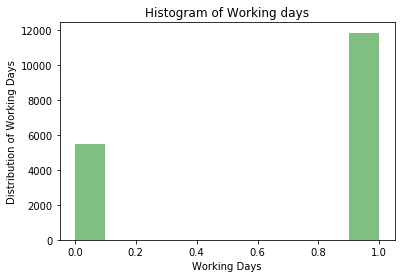

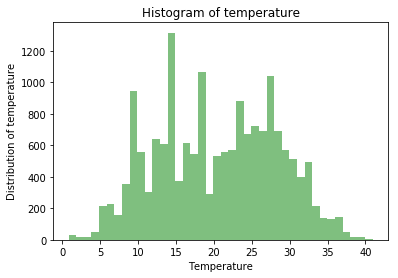

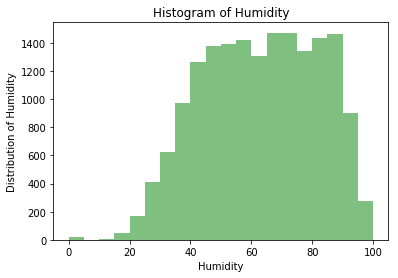

In [4]:
#pd.isnull(data) for checking if a cell is empty (was False)

#draw histograms
#print(type(data['season'])) # series

plt.hist(data['season'],bins=10,alpha=0.5,color='green')
plt.xlabel("Season")
plt.ylabel("Distribution of season")
plt.title("Histogram of Seasons")
plt.show()

plt.hist(data['weather'],bins=10,alpha=0.5,color='green')
plt.xlabel("Season")
plt.ylabel("Distribution of weather")
plt.title("Histogram of weather")
plt.show()

plt.hist(data['workingday'],bins=10,alpha=0.5,color='green')
plt.xlabel("Working Days")
plt.ylabel("Distribution of Working Days")
plt.title("Histogram of Working days")
plt.show()

plt.hist(data['temp'],bins=40,alpha=0.5,color='green')
plt.xlabel("Temperature")
plt.ylabel("Distribution of temperature")
plt.title("Histogram of temperature")
plt.show()

plt.hist(data['humidity'],bins=20,alpha=0.5,color='green')
plt.xlabel("Humidity")
plt.ylabel("Distribution of Humidity")
plt.title("Histogram of Humidity")
plt.show()

#Season has four categories of almost equal distribution.
#From the histograms obtained, we infer that weather 1 dominates(i.e. clear weather).    
#As expected, mostly working days and variable holiday is also showing a similar inference.
#We can generate a variable for weekday using holiday and working day.
#Incase, if both have zero values, then it must be a working day.

In [5]:
#convert to type category
#data['season'] = data.season.astype('category')
#data['weather'] = data.weather.astype('category')
#data['holiday'] = data.holiday.astype('category')
#data['workingday'] = data.workingday.astype('category')

#extract date and hour features from datetime column
data['date'] = data['datetime'].apply(lambda x : x.split() [0])
data['hour'] = data['datetime'].apply(lambda x: x.split() [1].split(':')[0])
#data.head()

#extract the above features in train and test set as well
train_data['date'] = train_data['datetime'].apply(lambda x : x.split() [0])
train_data['hour'] = train_data['datetime'].apply(lambda x: x.split() [1].split(':')[0])
#train_data.head()
test_data['date'] = test_data['datetime'].apply(lambda x : x.split() [0])
test_data['hour'] = test_data['datetime'].apply(lambda x: x.split() [1].split(':')[0])
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,0,0,2011-01-20,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,0,0,2011-01-20,01
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,0,0,2011-01-20,02
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,0,0,2011-01-20,03
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,0,0,2011-01-20,04


In [6]:
#extract from date - day, month and year
data['year'] = data['date'].apply(lambda x : x.split("-") [0])
data['month'] = data['date'].apply(lambda x : x.split("-") [1])
data['day'] = data['date'].apply(lambda x : x.split("-") [2])

train_data['year'] = train_data['date'].apply(lambda x : x.split("-") [0])
train_data['month'] = train_data['date'].apply(lambda x : x.split("-") [1])
train_data['day'] = train_data['date'].apply(lambda x : x.split("-") [2])
#train_data.head()
test_data['year'] = test_data['date'].apply(lambda x : x.split("-") [0])
test_data['month'] = test_data['date'].apply(lambda x : x.split("-") [1])
test_data['day'] = test_data['date'].apply(lambda x : x.split("-") [2])
#test_data.head()
# drop the datetime and date column as it's not required anymore
data = data.drop(['datetime','date'], axis=1)
train_data = train_data.drop(['datetime','date'], axis=1)
test_data = test_data.drop(['datetime','date'], axis=1)
data.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
x 0       1        0           0        1  9.84  14.395        81        0.0   
  1       1        0           0        1  9.02  13.635        80        0.0   
  2       1        0           0        1  9.02  13.635        80        0.0   
  3       1        0           0        1  9.84  14.395        75        0.0   
  4       1        0           0        1  9.84  14.395        75        0.0   

     casual  registered  count hour  year month day  
x 0       3          13     16   00  2011    01  01  
  1       8          32     40   01  2011    01  01  
  2       5          27     32   02  2011    01  01  
  3       3          10     13   03  2011    01  01  
  4       0           1      1   04  2011    01  01

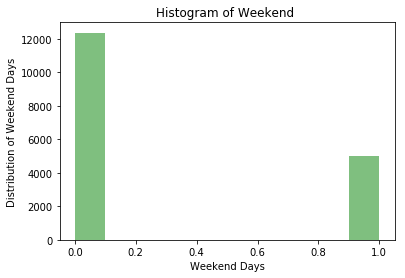

In [7]:
# create a feature weekend based on column holiday and workingday
data['weekend'] = 0
data.loc[(data.holiday==0) & (data.workingday==0),'weekend']=1

plt.hist(data['weekend'],bins=10,alpha=0.5,color='green')
plt.xlabel("Weekend Days")
plt.ylabel("Distribution of Weekend Days")
plt.title("Histogram of Weekend ")
plt.show()

train_data['weekend'] = 0
train_data.loc[(train_data.holiday==0) & (train_data.workingday==0),'weekend']=1

test_data['weekend'] = 0
test_data.loc[(test_data.holiday==0) & (test_data.workingday==0),'weekend']=1

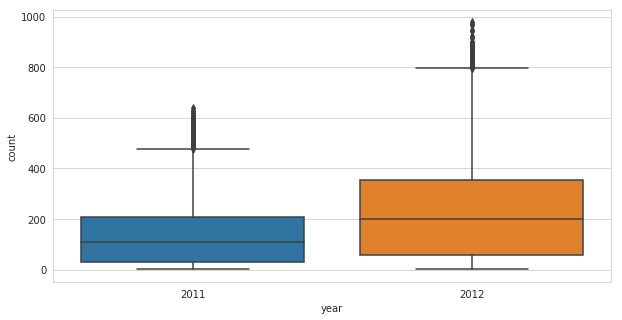

In [8]:
import seaborn as sn

# boxplot for year vs count
plt.figure(figsize=(10,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train_data,x='year',y='count')

# Depicts increasing demand over the year.

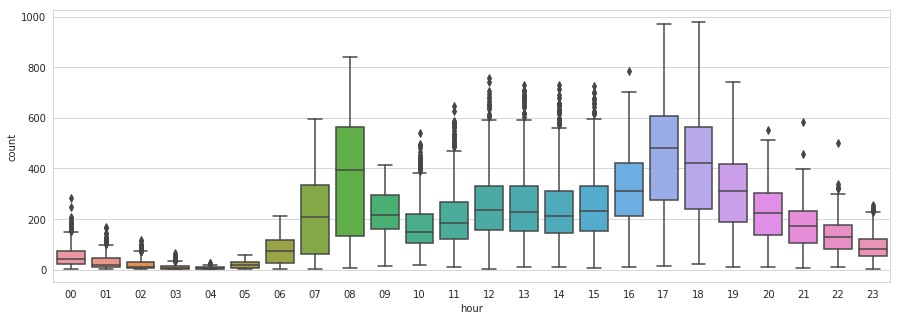

In [9]:
# boxplot for hour vs count
plt.figure(figsize=(15,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train_data, x='hour', y='count')

# High demand : 7-9 and 17-19
# Avg demand : 10-17
# Low demand : 00-7 and 19-24

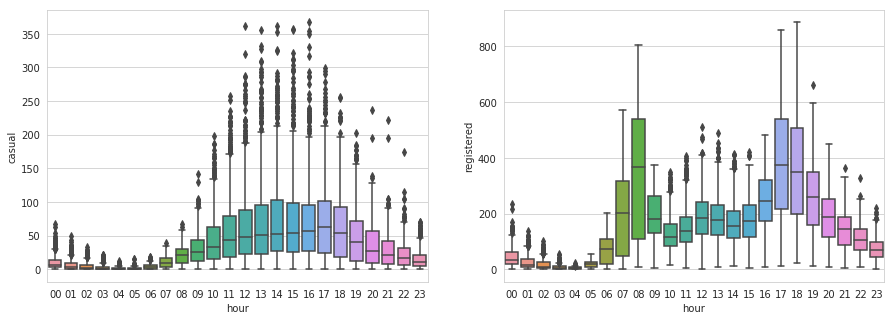

In [10]:
# boxplot for registered and casual user count vs hour.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sn.set_style(style='whitegrid')
ax1 = sn.boxplot(data=train_data, x='hour', y='casual', ax=ax1)
ax2 = sn.boxplot(data=train_data, x='hour', y='registered', ax=ax2)

# registered boxplot is similar to original hour vs count plot. However, casual plot is different.
# Also, note that there are many oultliers in casual compared to registered indicating no pattern for demand as such.
# Thus, hour is a very important feature.

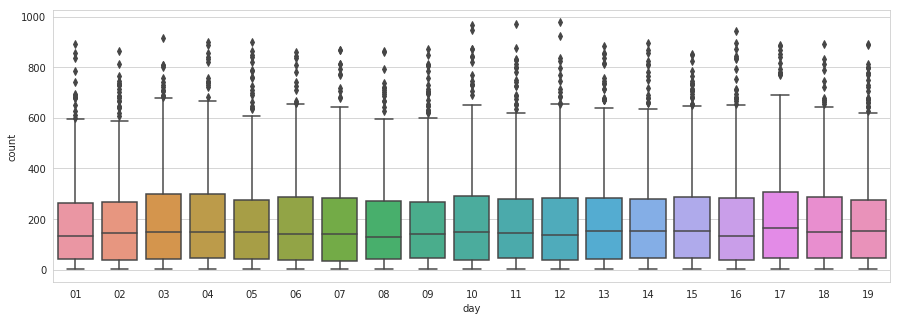

In [11]:
plt.figure(figsize=(15,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train_data, x='day', y='count')

# Almost uniform demand over days

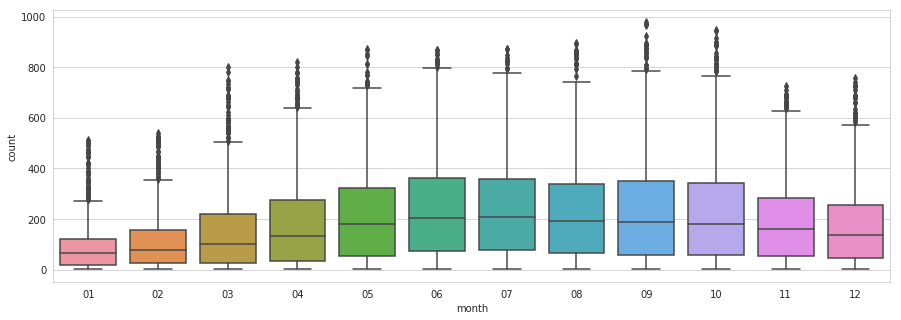

In [12]:
plt.figure(figsize=(15,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train_data, x='month', y='count')

In [13]:
# creating bins for hour based on 3 levels of deamand as mentioned earlier for casual customers
data['hour']=data['hour'].astype('int64')
data['hour_cas']=0
data.loc[data['hour']<=7,'hour_cas']=1
data.loc[(data['hour']>=8) & (data['hour']<=11),'hour_cas']=2
data.loc[(data['hour']>=10) & (data['hour']<=17),'hour_cas']=3
data.loc[(data['hour']>=18),'hour_cas']=2
data['hour_cas']=data['hour_cas'].astype('category')

train_data['hour_cas'] = 0
train_data['hour'] = train_data['hour'].astype('int64')
train_data.loc[(train_data['hour']<=6),'hour_cas']=1
train_data.loc[(train_data['hour']>=7) & (train_data['hour']<=9),'hour_cas']=3
train_data.loc[(train_data['hour']>=10) & (train_data['hour']<=16),'hour_cas']=2
train_data.loc[(train_data['hour']>=17) & (train_data['hour']<=19),'hour_cas']=3
train_data.loc[(train_data['hour']>=20),'hour_cas']=1
train_data['hour_cas']=train_data['hour_cas'].astype('category')

test_data['hour_cas'] = 0
test_data['hour'] = test_data['hour'].astype('int64')
test_data.loc[(test_data['hour']<=6),'hour_cas']=1
test_data.loc[(test_data['hour']>=7) & (test_data['hour']<=9),'hour_cas']=3
test_data.loc[(test_data['hour']>=10) & (test_data['hour']<=16),'hour_cas']=2
test_data.loc[(test_data['hour']>=17) & (test_data['hour']<=19),'hour_cas']=3
test_data.loc[(test_data['hour']>=20),'hour_cas']=1
test_data['hour_cas']=test_data['hour_cas'].astype('category')

In [14]:
# creating bins for hour based on 3 levels of deamand as mentioned earlier for registered customers
data['hour'] = data['hour'].astype('int64')
data['hour_reg']=0
data.loc[(data['hour']<=6),'hour_reg']=1
data.loc[(data['hour']>=7) & (data['hour']<=9),'hour_reg']=3
data.loc[(data['hour']>=10) & (data['hour']<=16),'hour_reg']=2
data.loc[(data['hour']>=17) & (data['hour']<=19),'hour_reg']=3
data.loc[(data['hour']>=20),'hour_reg']=1
#data['hour_cr']=data['hour'].astype('category')
data['hour_reg']=data['hour_reg'].astype('category')

train_data['hour_reg'] = 0
train_data['hour'] = train_data['hour'].astype('int64')
train_data.loc[(train_data['hour']<=6),'hour_reg']=1
train_data.loc[(train_data['hour']>=7) & (train_data['hour']<=9),'hour_reg']=3
train_data.loc[(train_data['hour']>=10) & (train_data['hour']<=16),'hour_reg']=2
train_data.loc[(train_data['hour']>=17) & (train_data['hour']<=19),'hour_reg']=3
train_data.loc[(train_data['hour']>=20),'hour_reg']=1
train_data['hour_reg']=train_data['hour_reg'].astype('category')

test_data['hour_reg'] = 0
test_data['hour'] = test_data['hour'].astype('int64')
test_data.loc[(test_data['hour']<=6),'hour_reg']=1
test_data.loc[(test_data['hour']>=7) & (test_data['hour']<=9),'hour_reg']=3
test_data.loc[(test_data['hour']>=10) & (test_data['hour']<=16),'hour_reg']=2
test_data.loc[(test_data['hour']>=17) & (test_data['hour']<=19),'hour_reg']=3
test_data.loc[(test_data['hour']>=20),'hour_reg']=1
test_data['hour_reg']=test_data['hour_reg'].astype('category')

In [15]:
for col in ['season','holiday','workingday','weather','hour','year','day','month','weekend']:
    train_data[col]=train_data[col].astype('category')
    test_data[col]=test_data[col].astype('category')
    data[col] = data[col].astype('category')
train_data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour          category
year          category
month         category
day           category
weekend       category
hour_cas      category
hour_reg      category
dtype: object

/home/ritik/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


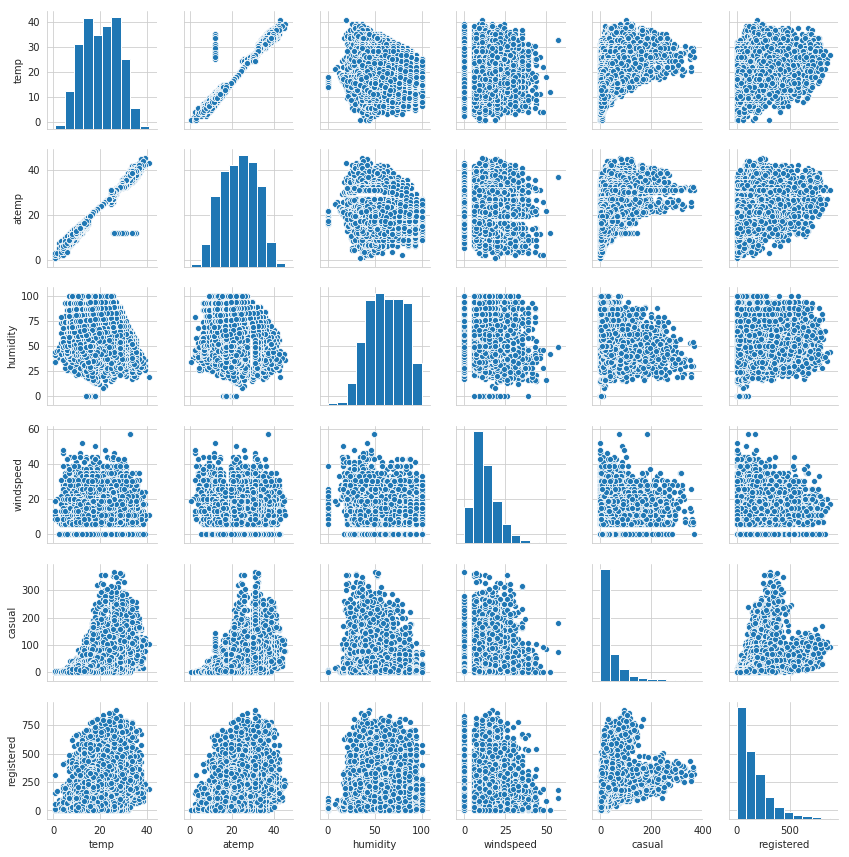

In [16]:
sn.pairplot(train_data[['temp','atemp','humidity','windspeed','casual','registered']],size=2)

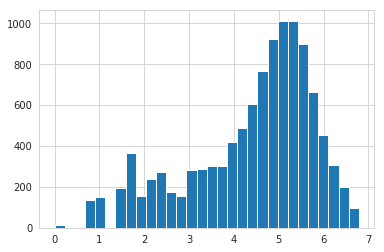

In [17]:
plt.hist(np.log(train_data.registered+1),bins=30)
plt.show()

In [18]:
features_cas=['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity',
       'windspeed', 'hour', 'year','day','month', 'weekend', 'hour_cas']
features_reg=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'hour', 'year','day','month', 'weekend', 'hour_reg']

In [19]:
train_data['target_reg']=np.log1p(train_data['registered']+1)
train_data['target_cas']=np.log1p(train_data['casual']+1)

In [20]:
def RMSLE(y,ypred):
    y=np.nan_to_num(y)
    ypred=np.nan_to_num(ypred)
    calc=(ypred-y)**2
    return np.sqrt(np.mean(calc))

In [21]:
from sklearn.model_selection import train_test_split
xtrain_cas,xtest_cas,ytrain_cas,ytest_cas=train_test_split(train_data[features_cas].values,np.ravel(train_data['target_cas'].values),test_size=0.25)
xtrain_reg,xtest_reg,ytrain_reg,ytest_reg=train_test_split(train_data[features_reg].values,np.ravel(train_data['target_reg'].values),test_size=0.25)

print(xtrain_cas.shape)
print(xtest_cas.shape)

(8164, 14)
(2722, 14)


In [44]:
from sklearn.linear_model import LinearRegression

clf_1_cas=LinearRegression()
clf_1_cas.fit(xtrain_cas,ytrain_cas)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cas,clf_1_cas.predict(xtrain_cas))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cas,clf_1_cas.predict(xtest_cas))))

clf_1_reg=LinearRegression()
clf_1_reg.fit(xtrain_reg,ytrain_reg)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_reg,clf_1_reg.predict(xtrain_reg))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_reg,clf_1_reg.predict(xtest_reg))))

RMSLE score for casual train 0.722105
RMSLE score for casual test 0.727577
RMSLE score for registered train 0.744320
RMSLE score for registered test 0.754385


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import sklearn

rmsle_scorer=sklearn.metrics.make_scorer(RMSLE,greater_is_better=False)

clf_4_cas=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cas=GridSearchCV(clf_4_cas,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cas.fit(xtrain_cas,ytrain_cas)
print ("Best params",grid_4_cas.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cas,grid_4_cas.best_estimator_.predict(xtrain_cas))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cas,grid_4_cas.best_estimator_.predict(xtest_cas))))

clf_4_reg=RandomForestRegressor()
grid_4_reg=GridSearchCV(clf_4_reg,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_reg.fit(xtrain_reg,ytrain_reg)
print ("Best params",grid_4_reg.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_reg,grid_4_reg.best_estimator_.predict(xtrain_reg))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_reg,grid_4_reg.best_estimator_.predict(xtest_reg))))

Best params {'max_depth': 10, 'n_estimators': 500}
RMSLE score for casual train 0.316316
RMSLE score for casual test 0.442317
Best params {'max_depth': 10, 'n_estimators': 300}
RMSLE score for registered train 0.209041
RMSLE score for registered test 0.307902


In [45]:
# feature scaling
from sklearn.preprocessing import StandardScaler  
sc_cas = StandardScaler() 
sc_cas.fit(xtrain_cas)

xtrain_cas_nn = sc_cas.transform(xtrain_cas)
xtest_cas_nn = sc_cas.transform(xtest_cas)

sc_reg = StandardScaler()
sc_reg.fit(xtrain_reg)

xtrain_reg_nn = sc_reg.transform(xtrain_reg)
xtest_reg_nn = sc_reg.transform(xtest_reg)

/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Da

In [75]:
from sklearn.neural_network import MLPRegressor

clf_5_cas = MLPRegressor(hidden_layer_sizes=(10,10,10), learning_rate='adaptive', max_iter=200)
param = {'alpha':np.logspace(-5, 3, 5), 'batch_size':[10,100,200,300] }

grid_5_cas = GridSearchCV(clf_5_cas,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_5_cas.fit(xtrain_cas_nn,ytrain_cas)
print ("Best params",grid_5_cas.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cas,grid_5_cas.best_estimator_.predict(xtrain_cas_nn))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cas,grid_5_cas.best_estimator_.predict(xtest_cas_nn))))

clf_5_reg = MLPRegressor(hidden_layer_sizes=(10,10,10), learning_rate='adaptive')
grid_5_reg = GridSearchCV(clf_5_reg,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_5_reg.fit(xtrain_reg_nn,ytrain_reg)
print ("Best params",grid_5_reg.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_reg,grid_5_reg.best_estimator_.predict(xtrain_reg_nn))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_reg,grid_5_reg.best_estimator_.predict(xtest_reg_nn))))

Best params {'alpha': 0.001, 'batch_size': 10}
RMSLE score for casual train 0.424100
RMSLE score for casual test 0.454476
Best params {'alpha': 1e-05, 'batch_size': 10}
RMSLE score for registered train 0.320518
RMSLE score for registered test 0.331620


In [67]:
scs_cas=StandardScaler()
scs_reg=StandardScaler()

train_cas_sd=scs_cas.fit_transform(train_data[features_cas].values)
train_reg_sd=scs_reg.fit_transform(train_data[features_reg].values)
test_cas_sd=scs_cas.transform(test_data[features_cas].values)
test_reg_sd=scs_reg.transform(test_data[features_reg].values)

/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ritik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Da

In [71]:
clf_final_cas=RandomForestRegressor(n_estimators=500,max_depth=10)
clf_final_reg=RandomForestRegressor(n_estimators=300,max_depth=10)

clf_final_cas.fit(train_cas_sd,train_data['target_cas'].values)
clf_final_reg.fit(train_reg_sd,train_data['target_reg'].values)

pred_cas=(np.exp(clf_final_cas.predict(test_cas_sd)))-1
pred_reg=(np.exp(clf_final_reg.predict(test_reg_sd)))-1

In [72]:
pred_cas.shape
count=pred_cas+pred_reg
print (count.shape)
print(test_data.shape)

(6493,)
(6493, 18)


In [73]:
test1=pd.read_csv('bsd_dataset/test.csv')
submission_1=pd.DataFrame(test1['datetime'])
submission_1['count']=count
submission_1['count']=submission_1['count'].astype('int')
submission_1.head()

,datetime,count
0,2011-01-20 00:00:00,14
1,2011-01-20 01:00:00,7
2,2011-01-20 02:00:00,5
3,2011-01-20 03:00:00,4
4,2011-01-20 04:00:00,4


In [76]:
submission_1.to_csv('bsd_dataset/sampleSubmission.csv')